In [1]:
# Import used modules
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.preprocessing
import time

In [37]:
# Define data preprocessing functions
CSV_COLUMN_NAMES = ('time', 'u', 'i')

def _normalize_df(df: pd.DataFrame, normalize: bool) -> None:
    """
    Replace ',' with '.', convert columns to float type
    and normalize to range (0, 1)
    """
    scaler = sklearn.preprocessing.MinMaxScaler((0, 1)) if normalize else None

    for col in df.columns:
        df.loc[:, col] = df.loc[:, col].apply(lambda x: x.replace(',', '.'))
        df.loc[:, col] = df.loc[:, col].astype(np.float64)
        if normalize:
            df.loc[:, col] = scaler.fit_transform(df.loc[:, col].values.reshape(-1, 1))

def load_csv(data_path: str, normalize=True) -> pd.DataFrame:
    df = pd.read_csv(data_path, delimiter=';', names=CSV_COLUMN_NAMES, header=0)
    _normalize_df(df, normalize)
    return df

# Read training data
path = 'data/arrester_data.csv'
df = load_csv(path, normalize=True)

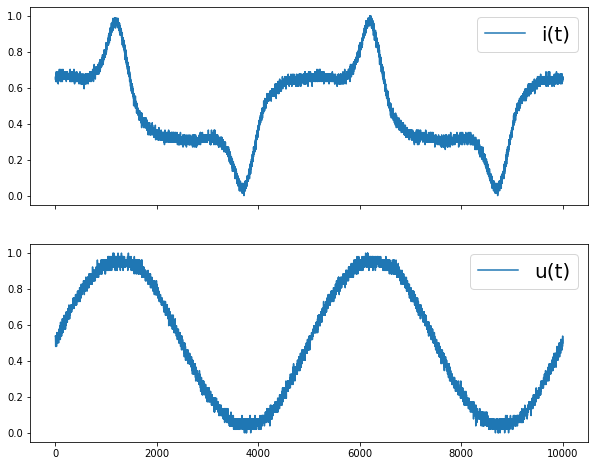

In [38]:
# Plotting training data
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 8))

ax1.plot(df.loc[:, 'i'], label='i(t)')
ax1.legend(loc='upper right', prop={'size': 20})

ax2.plot(df.loc[:, 'u'], label='u(t)')
ax2.legend(loc='upper right', prop={'size': 20})

plt.show()

In [41]:
# Creating training array for recurrent neural network
n_timestamps = 32    # Number of points in single sequence
batch_size = 64      # Number of sequences in single data batch
shuffle_batch = 1000 # Number of data points in single shuffle batch 

x = df.loc[:, ['i', 'u']].values  # Converting to numpy array
training_array = []

for i in range(len(x) - n_timestamps):
    training_array.append(x[i:i + n_timestamps])

x_train = np.array(training_array)
y_train = x_train

print(f'Training x shape: {x_train.shape}')
print(f'Training y shape: {y_train.shape}')

Training x shape: (9968, 32, 2)
Training y shape: (9968, 32, 2)


In [33]:
# Converting to tensorflow Datasets - for optimization
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.cache().batch(batch_size).shuffle(shuffle_batch).repeat()